In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import hybrid_functions
from hybrid_functions import get_img_freq, freq_filtering, Ideal_filter, Gaussian_filter, Hybrid_image

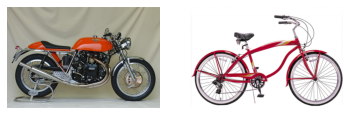

In [2]:
# show original input images
img_path = "./hw2_data/task1,2_hybrid_pyramid/1_motorcycle.bmp"
img_path2 = "./hw2_data/task1,2_hybrid_pyramid/1_bicycle.bmp"

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB) 
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(img2)

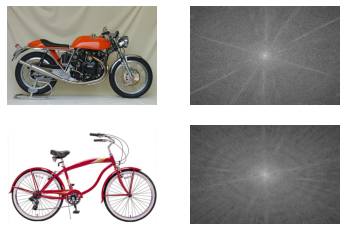

In [3]:
# show  original input image and the Magnitude Spectrum of the image
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(img)

plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(get_img_freq(img),cmap='gray')

plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(img2)

plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(get_img_freq(img2), cmap='gray')

11


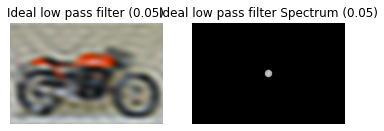

In [4]:
# set cut off freqency and use ideal low pass filter 
cut_off_ratio= 0.07

low_filter_image, low_filter_spectrum = Ideal_filter(img, cut_off_ratio, low_or_high=True)

height, width, channel= img.shape


ideal_filter=np.zeros((height,width))
shape = min(height,width)
D0 = math.ceil(shape / 2 * cut_off_ratio)
print(D0)


plt.subplot(1,2,1)
plt.axis('off')
plt.title('Ideal low pass filter (0.05)')
plt.imshow(low_filter_image.astype('uint8'))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Ideal low pass filter Spectrum (0.05)')
plt.imshow(low_filter_spectrum[:,:,0], cmap='gray')

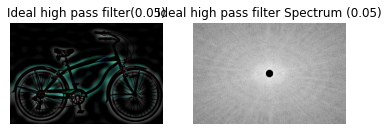

In [5]:
# set cut off freqency and use ideal high pass filter 

high_filter_image, high_filter_spectrum = Ideal_filter(img2, cut_off_ratio, low_or_high=False)

plt.imshow(low_filter_spectrum[:,:,0], cmap='gray')
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Ideal high pass filter(0.05)')
plt.imshow(high_filter_image.astype('uint8'))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Ideal high pass filter Spectrum (0.05)')
plt.imshow(high_filter_spectrum[:,:,0], cmap='gray')

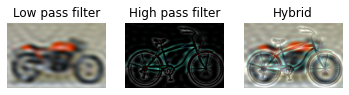

In [6]:
# hybrid the low and high pass filtering results
hybrid_img = Hybrid_image(img, img2, 0.07, Ideal_filter)
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Low pass filter')
plt.imshow(low_filter_image.astype('uint8'))

plt.subplot(1,3,2)
plt.axis('off')
plt.title('High pass filter')
plt.imshow(high_filter_image.astype('uint8'))

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Hybrid')
plt.imshow(hybrid_img.astype('uint8'))

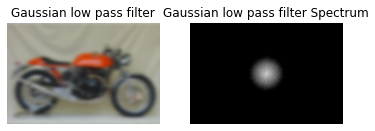

In [7]:
# set cut off freqency and use gaussian low pass filter

low_filter_image, low_filter_spectrum = Gaussian_filter(img, cut_off_ratio, True)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Gaussian low pass filter')
plt.imshow(low_filter_image.astype('uint8'))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Gaussian low pass filter Spectrum')
plt.imshow(low_filter_spectrum[:,:,0], cmap='gray')

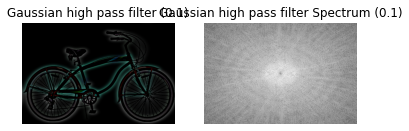

In [8]:
# set cut off freqency and use gaussian low pass filter

high_filter_image, high_filter_spectrum = Gaussian_filter(img2, cut_off_ratio, False)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Gaussian high pass filter (0.1)')
plt.imshow(high_filter_image.astype('uint8'))

plt.subplot(1,2,2)
plt.axis('off')
plt.title('Gaussian high pass filter Spectrum (0.1)')
plt.imshow(high_filter_spectrum[:,:,0], cmap='gray')

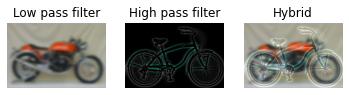

In [9]:
# hybrid the gaussian low and high pass filtering results
hybrid_img = Hybrid_image(img, img2, 0.07, Gaussian_filter)
plt.subplot(1,3,1)
plt.axis('off')
plt.title('Low pass filter')
plt.imshow(low_filter_image.astype('uint8'))

plt.subplot(1,3,2)
plt.axis('off')
plt.title('High pass filter')
plt.imshow(high_filter_image.astype('uint8'))

plt.subplot(1,3,3)
plt.axis('off')
plt.title('Hybrid')
plt.imshow(hybrid_img.astype('uint8'))

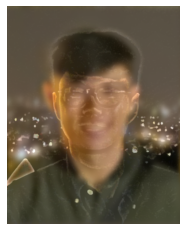

In [10]:
img_path = "./hw2_data/task1,2_hybrid_pyramid/harry.jpg"
img_path2 = "./hw2_data/task1,2_hybrid_pyramid/kuo.jpg"
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(img_path2), cv2.COLOR_BGR2RGB) 
hybrid_img = Hybrid_image(img, img2, 0.07, Gaussian_filter)
plt.axis('off')
plt.imshow(hybrid_img.astype('uint8'),cmap='gray')